# Traitement des valeurs manquantes

Il existe de nombreuses façons dont les données peuvent se retrouver avec des valeurs manquantes. Par exemple,

Une maison de 2 chambres n'inclura pas de valeur pour la taille d'une troisième chambre.
Un répondant à l'enquête peut choisir de ne pas partager son revenu.
La plupart des bibliothèques d'apprentissage automatique (y compris scikit-learn) génèrent une erreur si vous essayez de créer un modèle en utilisant des données avec des valeurs manquantes. Vous devrez donc choisir l'une des stratégies ci-dessous.





### Notre programme du TP1

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from helpers import tp1_2 

# Chargement des données
iowa_file_path = 'data/iowa_data.csv'
home_data = pd.read_csv(iowa_file_path)

# Selection de la variable cible
y = home_data.SalePrice

# Pour simplifier, on va utiliser seulement quelques variables prédictives
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[feature_names]

# Division des données en ensemble d'entrainement et ensemble de validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


In [3]:
# Ecrivez une fonction pour entrainer le modèle et evaluer la performance
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Essai 1: Entrainement et évaluation du modèle avec LinearRegression
score = score_dataset(X_train, X_valid, y_train, y_valid)
print('MAE (LinearRegression):', score)

tp1_2.step1.check(score)
# tp1_2.step1.hint()
# tp1_2.step1.solution()

MAE (LinearRegression): 29680.799555678048


  1 Expected score to be 29680.799555678055 , but got 29680.799555678048                                           

### Utiliser toutes les variables prédictives numériques qui contienent de valeurs manquantes 
On aura une erreur si on essaie de construire un modèle avec des valeurs manquantes.

In [15]:
# # Pour simplifier, on va utiliser seulement quelques variables prédictives
# feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
# X = home_data[feature_names]

# On va utiliser toutes les variables prédictives numériques
predictors = home_data.drop(['SalePrice'], axis=1)
X = predictors.select_dtypes(exclude=['object'])

# Division des données en ensemble d'entrainement et ensemble de validation, avec test_size=0.2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


tp1_2.step2.check(X_train, X_valid, y_train, y_valid)
# tp1_2.step2.hint()
# tp1_2.step2.solution()

# Essai 2: Entrainement et évaluation du modèle avec tous les variables prédictives numériques
# Celui donne une erreur car il y a des valeurs manquantes dans les variables prédictives
# Vous pouvez décommenter cette ligne pour voir l'erreur
#score = score_dataset(X_train, X_valid, y_train, y_valid)

  1 Looks good. Good job!                                                                                          

Examiner les données et voir le stats de valeurs manquantes

In [6]:
# Forme des données d'entrainement (num_lignes, num_colonnes)
print(X_train.shape)

# Nombre de valeurs manquantes dans chaque colonne des données d'entrainement
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1168, 37)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


In [11]:
# Remplir la ligne ci-dessous: Combien de lignes sont dans les données d'entrainement?
num_rows = X_train.shape

# Combien de colonnes dans les données d'entrainement ont des valeurs manquantes?
num_cols_with_missing = (X_train.isnull().sum())

# Combien d'entrées manquantes sont contenues dans toutes les données d'entrainement?
tot_missing = num_cols_with_missing[num_cols_with_missing > 0]

tp1_2.step3.check(num_rows, num_cols_with_missing, tot_missing)
# tp1_2.step3.hint()
# tp1_2.step3.solution()

  1 Expected num_rows to be 1168, but got (1168, 37)                                                               

### Supprimer les colonnes avec des valeurs manquantes

C'est la façon la plus simple de traiter les valeurs manquantes.

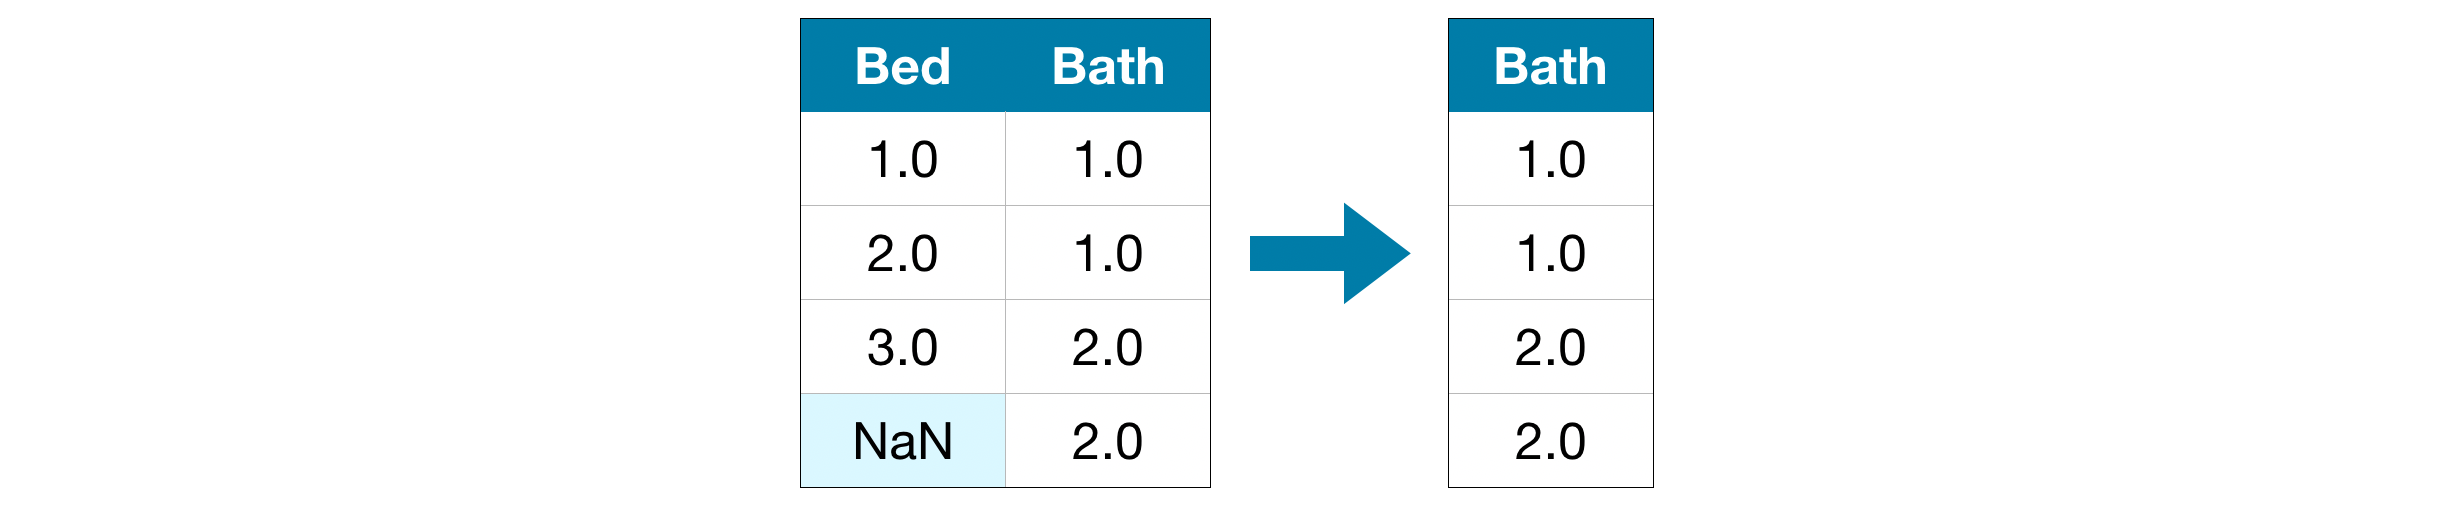

Sauf la plupart des valeurs dans les colonnes supprimées sont manquantes, le modèle perd l'accès à beaucoup d'informations (potentiellement utiles!) Avec cette approche. Comme exemple extrême, considérez un ensemble de données avec 10 000 lignes, où une colonne importante manque une seule entrée. Cette approche supprimerait complètement la colonne!

Dans cette étape, vous prétraiterez les données dans X_train et X_valid pour supprimer les colonnes avec des valeurs manquantes. Définissez les DataFrames prétraités sur X_train_reduced et X_valid_reduced, respectivement.

In [12]:
# Remplir la ligne ci-dessous: obtenir les noms des colonnes avec des valeurs manquantes
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Remplir la ligne ci-dessous: supprimer les colonnes dans les données d'entrainement et de validation
X_train_reduced = X_train.drop(cols_with_missing, axis=1)
X_valid_reduced = X_valid.drop(cols_with_missing, axis=1)

# Essai 3: Entrainement et évaluation du modèle avec les variables prédictives numériques sans valeurs manquantes
score = score_dataset(X_train_reduced, X_valid_reduced, y_train, y_valid)
print('MAE (Drop columns with missing values):', score)

# Vérifie tes résultats
tp1_2.step4.check(X_train_reduced, X_valid_reduced, score)
# # Lignes ci-dessous pour obtenir de l'aide si tu es bloqué
# tp1_2.step4.hint()
# tp1_2.step4.solution()




MAE (Drop columns with missing values): 23842.062627904437


  1 Expected score to be 23842.062627904717, but got 23842.062627904437                                            

### Imputation

L'imputation remplit les valeurs manquantes avec un nombre. Par exemple, nous pouvons remplir la valeur moyenne le long de chaque colonne.

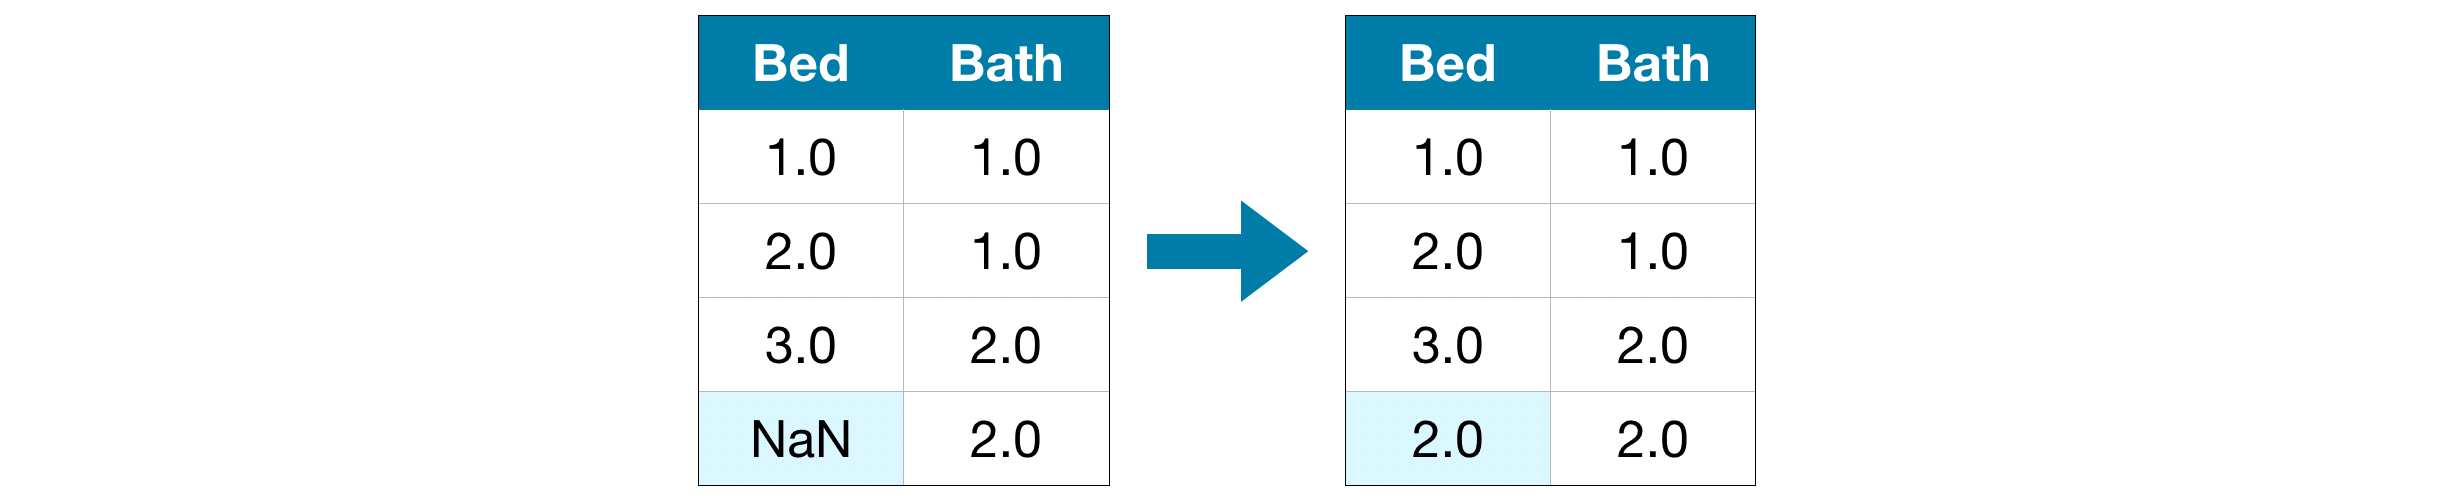

Les valeurs imputées ne seront pas exactement correctes dans la plupart des cas, mais elles conduisent généralement à des modèles plus précis que ceux que vous obtiendriez en supprimant complètement la colonne.

Utiliser le code suivant pour imputer les valeurs manquantes avec la valeur moyenne le long de chaque colonne. Définissez les DataFrames prétraités sur imputed_X_train et imputed_X_valid. Assurez-vous que les noms de colonnes correspondent à ceux de X_train et X_valid.

In [13]:
# On doit aussi traiter les valeurs manquantes NaN
# Remplacer les valeurs manquantes par la moyenne de la colonne
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# L'imputation a supprimé les noms de colonnes; remets-les
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

# Essai 4: Entrainement et évaluation du modèle avec les variables prédictives numériques sans valeurs manquantes
score = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)
print (f"score = {score}")


score = 23966.142504009666


Dans cet approche, on impute les valeurs manquantes, comme avant. Et, en plus, pour chaque colonne avec des entrées manquantes dans l'ensemble de données d'origine, nous ajoutons une nouvelle colonne qui montre l'emplacement des entrées imputées.

**Attention:** Dans certains cas, cela améliorera de manière significative les résultats. Dans d'autres cas, cela n'aide pas du tout.

In [14]:
# Créer une copie pour éviter de changer les données originales (lors de l'imputation)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Creer une colonne pour savoir si une valeur était manquante
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# L'imputation a enlevé les noms de colonnes, on les remet
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

# Essai 5: Entrainement et évaluation du modèle avec les variables prédictives numériques 
# sans valeurs manquantes mais avec une colonne pour savoir si une valeur était manquante

score = score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid)
print("score: ", score)

score:  23706.546927837713
